In [1]:
import numpy as np
import pandas as pd

import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

# Préparation des données

## Importation des données

In [2]:
PIB = pd.read_csv('PIB_RNB (2).csv')
PIB.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,496.940553,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2020,2020,US$,508.453722,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2019,2019,US$,504.846446,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2020,2020,US$,513.307305,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,6001.389576,X,Ciffre de sources internationales,NaN


In [3]:
population = pd.read_csv('Population.csv')
population.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,37769.499,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,38972.230,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2021,2021,1000 personnes,40099.462,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,710,Afrique du Sud,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,58087.055,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,710,Afrique du Sud,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,58801.927,X,Ciffre de sources internationales,NaN


In [4]:
inflation = pd.read_csv('InflationPrixConso.csv')
inflation.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
0,CP,Indices de Prix à la Consommation,4,Afghanistan,2019,2019,23014,Food price inflation,7001,Janvier,%,-0.413473,E,Valeur estimée,NaN
1,CP,Indices de Prix à la Consommation,4,Afghanistan,2019,2019,23014,Food price inflation,7002,Février,%,0.140873,E,Valeur estimée,NaN
2,CP,Indices de Prix à la Consommation,4,Afghanistan,2019,2019,23014,Food price inflation,7003,Mars,%,2.621606,E,Valeur estimée,NaN
3,CP,Indices de Prix à la Consommation,4,Afghanistan,2019,2019,23014,Food price inflation,7004,Avril,%,5.115616,E,Valeur estimée,NaN
4,CP,Indices de Prix à la Consommation,4,Afghanistan,2019,2019,23014,Food price inflation,7005,Mai,%,7.040566,E,Valeur estimée,NaN


In [5]:
dispoAlimentaire = pd.read_csv('DispoAlimentaire.csv')
dispoAlimentaire.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2511,Blé et produits,2020,2020,Milliers de tonnes,5185.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - Quantité,S2511,Blé et produits,2020,2020,Milliers de tonnes,2741.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5072,Variation de stock,S2511,Blé et produits,2020,2020,Milliers de tonnes,496.0,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5911,Exportations - Quantité,S2511,Blé et produits,2020,2020,Milliers de tonnes,0.0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5301,Disponibilité intérieure,S2511,Blé et produits,2020,2020,Milliers de tonnes,7429.0,I,Valeur imputée


In [6]:
stabilitePolitique = pd.read_csv('StabilitePolitique.csv')
stabilitePolitique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-2.73,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-0.24,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,0.08,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-0.86,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,0.67,X,Ciffre de sources internationales,NaN


## Nettoyage des données

### Filtres années

In [7]:
for i in pd.unique(PIB['Année']) :
     if (i in pd.unique(population['Année'])) & (i in pd.unique(inflation['Année'])) & (i in pd.unique(dispoAlimentaire['Année']) )& (i in pd.unique(stabilitePolitique['Année'])):
            print(i)

2020


In [8]:
PIB = PIB.loc[PIB['Année'] == 2020]
population = population.loc[population['Année'] == 2020]
inflation = inflation.loc[inflation['Année'] == 2020]
dispoAlimentaire = dispoAlimentaire.loc[dispoAlimentaire['Année'] == 2020]
stabilitePolitique = stabilitePolitique.loc[stabilitePolitique['Année'] == 2020]

### Dispo alimentaire

In [9]:
pd.unique(dispoAlimentaire['Unité'])

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour', 'kcal',
       'g/personne/jour', 'g'], dtype=object)

In [10]:
dispoAlim = dispoAlimentaire.copy()

In [11]:
dispoAlim['Element_Produit_Unité'] = dispoAlim['Élément']+ '_'+dispoAlim['Produit']+'_'+dispoAlim['Unité']

In [12]:
dispoAlim = dispoAlim.drop(['Code Élément','Élément','Code Produit (CPC)','Produit','Unité'], axis = 1)

In [13]:
print(pd.unique(dispoAlim['Description du Symbole']))
print(pd.unique(dispoAlim['Symbole']))
print(pd.unique(dispoAlim['Année']))
print(pd.unique(dispoAlim['Domaine']))

['Valeur imputée' 'Valeur estimée']
['I' 'E']
[2020]
['Bilans Alimentaires (2010-)']


In [14]:
dispoAlim = dispoAlim.drop(['Description du Symbole','Symbole','Code année','Domaine','Code Domaine','Code zone (M49)'], axis = 1)
dispoAlim.head()

,Zone,Année,Valeur,Element_Produit_Unité
0,Afghanistan,2020,5185.0,Production_Blé et produits_Milliers de tonnes
1,Afghanistan,2020,2741.0,Importations - Quantité_Blé et produits_Millie...
2,Afghanistan,2020,496.0,Variation de stock_Blé et produits_Milliers de...
3,Afghanistan,2020,0.0,Exportations - Quantité_Blé et produits_Millie...
4,Afghanistan,2020,7429.0,Disponibilité intérieure_Blé et produits_Milli...


In [15]:
dispoAlim.duplicated().sum()

0

In [16]:
dispoAlim.isna().sum()

Zone                     0
Année                    0
Valeur                   0
Element_Produit_Unité    0
dtype: int64

### Population

In [17]:
population.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
1,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,38972.230,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,710,Afrique du Sud,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,58801.927,X,Ciffre de sources internationales,NaN
7,OA,Séries temporelles annuelles,8,Albanie,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,2866.849,X,Ciffre de sources internationales,NaN
10,OA,Séries temporelles annuelles,12,Algérie,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,43451.666,X,Ciffre de sources internationales,NaN
13,OA,Séries temporelles annuelles,276,Allemagne,511,Population totale,3010,Population-Estimations,2020,2020,1000 personnes,83328.988,X,Ciffre de sources internationales,NaN


In [18]:
population.shape

(235, 15)

In [19]:
print(pd.unique(population['Code Domaine']))
print(pd.unique(population['Code Élément']))
print(pd.unique(population['Code Produit']))
print(pd.unique(population['Symbole']))
print(pd.unique(population['Description du Symbole']))
print(pd.unique(population['Unité']))    
print(pd.unique(population['Année']))                                           

['OA']
[511]
[3010]
['X']
['Ciffre de sources internationales']
['1000 personnes']
[2020]


In [20]:
population = population.drop(['Code année','Domaine','Code Domaine','Note','Symbole','Description du Symbole','Code Produit','Code Élément','Code zone (M49)'], axis =1)

In [21]:
population['Element_Produit_Unité'] = population['Élément']+'_'+ population['Produit']+'_'+population['Unité']
population = population.drop(['Élément','Produit','Unité'], axis = 1)
population.head()

,Zone,Année,Valeur,Element_Produit_Unité
1,Afghanistan,2020,38972.230,Population totale_Population-Estimations_1000 ...
4,Afrique du Sud,2020,58801.927,Population totale_Population-Estimations_1000 ...
7,Albanie,2020,2866.849,Population totale_Population-Estimations_1000 ...
10,Algérie,2020,43451.666,Population totale_Population-Estimations_1000 ...
13,Allemagne,2020,83328.988,Population totale_Population-Estimations_1000 ...


In [22]:
population.duplicated().sum()

0

In [23]:
population.isna().sum()

Zone                     0
Année                    0
Valeur                   0
Element_Produit_Unité    0
dtype: int64

### Stabilité politique

In [24]:
stabilitePolitique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-2.73,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-0.24,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,0.08,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,-0.86,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2020,2020,indice,0.67,X,Ciffre de sources internationales,NaN


In [25]:
stabilitePolitique.shape

(199, 15)

In [26]:
print(pd.unique(stabilitePolitique['Note']))
print(pd.unique(stabilitePolitique['Code Domaine']))
print(pd.unique(stabilitePolitique['Code Élément']))
print(pd.unique(stabilitePolitique['Code Produit']))
print(pd.unique(stabilitePolitique['Symbole']))
print(pd.unique(stabilitePolitique['Description du Symbole']))
print(pd.unique(stabilitePolitique['Unité']))    
print(pd.unique(stabilitePolitique['Année']))                                           

[nan]
['FS']
[6125]
[21032]
['X']
['Ciffre de sources internationales']
['indice']
[2020]


In [27]:
stabilitePolitique = stabilitePolitique.drop(['Code année','Domaine','Code Domaine','Note','Symbole','Description du Symbole','Code Produit','Code Élément','Code zone (M49)'], axis =1)
stabilitePolitique['Element_Produit_Unité'] = stabilitePolitique['Élément']+'_'+ stabilitePolitique['Produit']+'_'+stabilitePolitique['Unité']
stabilitePolitique = stabilitePolitique.drop(['Élément','Produit','Unité'], axis = 1)
stabilitePolitique.head()

,Zone,Année,Valeur,Element_Produit_Unité
0,Afghanistan,2020,-2.73,Valeur_Stabilité politique et absence de viole...
1,Afrique du Sud,2020,-0.24,Valeur_Stabilité politique et absence de viole...
2,Albanie,2020,0.08,Valeur_Stabilité politique et absence de viole...
3,Algérie,2020,-0.86,Valeur_Stabilité politique et absence de viole...
4,Allemagne,2020,0.67,Valeur_Stabilité politique et absence de viole...


In [28]:
stabilitePolitique.duplicated().sum()

0

In [29]:
stabilitePolitique.isna().sum()

Zone                     0
Année                    0
Valeur                   0
Element_Produit_Unité    0
dtype: int64

### PIB

In [30]:
PIB.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2020,2020,US$,508.453722,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2020,2020,US$,513.307305,X,Ciffre de sources internationales,NaN
5,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2020,2020,US$,5094.384038,X,Ciffre de sources internationales,NaN
7,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22011,Revenu national brut,2020,2020,US$,4998.910130,X,Ciffre de sources internationales,NaN
9,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2020,2020,US$,5180.914198,X,Ciffre de sources internationales,NaN


In [31]:
PIB['Élément'] = "Valeur US dollars par habitant"

In [32]:
PIB['Unité'] = "US dollars"

In [33]:
PIB['Element_Produit_Unité'] = PIB['Élément']+ '_'+PIB['Produit']+'_'+PIB['Unité']
PIB = PIB.drop(['Code zone (M49)','Code Élément','Élément','Code Produit','Produit','Unité','Code année'], axis = 1)

In [34]:
print(pd.unique(PIB['Code Domaine']))
print(pd.unique(PIB['Symbole']))
print(pd.unique(PIB['Description du Symbole']))                                          

['MK']
['X' 'E']
['Ciffre de sources internationales' 'Valeur estimée']


In [35]:
PIB.loc[PIB['Symbole'] == 'E']

,Code Domaine,Domaine,Zone,Année,Valeur,Symbole,Description du Symbole,Note,Element_Produit_Unité
157,MK,Indicateurs macro,Chine,2020,10429.630529,E,Valeur estimée,NaN,Valeur US dollars par habitant_Produit Intérie...
159,MK,Indicateurs macro,Chine,2020,10372.491039,E,Valeur estimée,NaN,Valeur US dollars par habitant_Revenu national...


In [36]:
PIB = PIB.drop(['Description du Symbole','Symbole','Domaine','Code Domaine','Note'], axis = 1)
PIB.head()

,Zone,Année,Valeur,Element_Produit_Unité
1,Afghanistan,2020,508.453722,Valeur US dollars par habitant_Produit Intérie...
3,Afghanistan,2020,513.307305,Valeur US dollars par habitant_Revenu national...
5,Afrique du Sud,2020,5094.384038,Valeur US dollars par habitant_Produit Intérie...
7,Afrique du Sud,2020,4998.910130,Valeur US dollars par habitant_Revenu national...
9,Albanie,2020,5180.914198,Valeur US dollars par habitant_Produit Intérie...


In [37]:
PIB.duplicated().sum()

0

In [38]:
PIB.isna().sum()

Zone                     0
Année                    0
Valeur                   0
Element_Produit_Unité    0
dtype: int64

### Inflation

In [39]:
pd.unique(inflation['Unité'])

array(['%', nan], dtype=object)

In [40]:
inflation.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code année,Année,Code Produit,Produit,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole,Note
12,CP,Indices de Prix à la Consommation,4,Afghanistan,2020,2020,23014,Food price inflation,7001,Janvier,%,5.985349,E,Valeur estimée,NaN
13,CP,Indices de Prix à la Consommation,4,Afghanistan,2020,2020,23014,Food price inflation,7002,Février,%,6.428874,E,Valeur estimée,NaN
14,CP,Indices de Prix à la Consommation,4,Afghanistan,2020,2020,23014,Food price inflation,7003,Mars,%,5.072793,E,Valeur estimée,NaN
15,CP,Indices de Prix à la Consommation,4,Afghanistan,2020,2020,23014,Food price inflation,7004,Avril,%,16.562751,E,Valeur estimée,NaN
16,CP,Indices de Prix à la Consommation,4,Afghanistan,2020,2020,23014,Food price inflation,7005,Mai,%,12.924873,E,Valeur estimée,NaN


In [41]:
inflation = inflation.loc[inflation['Produit'] == "Food price inflation"]
inflationAnnuelle = inflation.groupby("Zone").mean()
inflation = pd.merge(inflation, inflationAnnuelle, on = 'Zone', how = 'inner')

In [42]:
inflation.columns

Index(['Code Domaine', 'Domaine', 'Code zone (M49)_x', 'Zone', 'Code année_x',
       'Année_x', 'Code Produit_x', 'Produit', 'Code Mois_x', 'Mois', 'Unité',
       'Valeur_x', 'Symbole', 'Description du Symbole', 'Note',
       'Code zone (M49)_y', 'Code année_y', 'Année_y', 'Code Produit_y',
       'Code Mois_y', 'Valeur_y'],
      dtype='object')

In [43]:
inflation = inflation.drop(['Code Domaine','Domaine','Code zone (M49)_x','Code année_x','Code Produit_x', 'Code Mois_x', 'Mois',  'Note',
       'Code zone (M49)_y', 'Code année_y', 'Année_y', 'Code Produit_y', 'Valeur_x',
       'Code Mois_y'], axis = 1)

In [44]:
inflation['Element_Produit_Unité'] = inflation['Produit']+'_'+inflation['Unité']

In [45]:
inflation = inflation.drop(['Produit','Unité'], axis = 1)

In [46]:
print(pd.unique(inflation['Symbole']))
print(pd.unique(inflation['Description du Symbole']))                                          

['E']
['Valeur estimée']


In [47]:
inflation = inflation.drop(['Description du Symbole','Symbole'], axis = 1)

In [48]:
inflation.rename(columns ={"Année_x" : 'Année','Valeur_y':'Valeur'},inplace = True)
inflation.head()

,Zone,Année,Valeur,Element_Produit_Unité
0,Afghanistan,2020,9.999103,Food price inflation_%
1,Afghanistan,2020,9.999103,Food price inflation_%
2,Afghanistan,2020,9.999103,Food price inflation_%
3,Afghanistan,2020,9.999103,Food price inflation_%
4,Afghanistan,2020,9.999103,Food price inflation_%


In [49]:
inflation.shape

(2436, 4)

In [50]:
inflation.duplicated().sum()

2233

In [51]:
inflation.drop_duplicates(inplace = True)

In [52]:
inflation.duplicated().sum()

0

In [53]:
inflation.isna().sum()

Zone                     0
Année                    0
Valeur                   0
Element_Produit_Unité    0
dtype: int64

## Transformation des données

In [54]:
population_pivot = pd.pivot_table(population, values=['Valeur'], index=['Zone','Année'],
                    columns=['Element_Produit_Unité'], aggfunc=np.sum, fill_value=0)
population_pivot

,,Valeur
,Element_Produit_Unité,Population totale_Population-Estimations_1000 personnes
Zone,Année,
Afghanistan,2020,38972.230
Afrique du Sud,2020,58801.927
Albanie,2020,2866.849
Algérie,2020,43451.666
Allemagne,2020,83328.988
...,...,...
Îles Salomon,2020,691.191
Îles Turques-et-Caïques,2020,44.276


On va filtrer les produits de disponibilité alimentaire qui nous intéressent pour notre analyse, à savoir la volaille.

In [55]:
pd.unique(dispoAlimentaire['Produit'])


array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Manioc et produits', 'Pommes de Terre et produits',
       'Patates douces', 'Ignames', 'Racines nda', 'Sucre, canne',
       'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres', 'Miel',
       'Haricots', 'Pois', 'Légumineuses Autres et produits',
       'Noix et produits', 'Soja', 'Arachides', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produ

In [56]:
dispoAlimentaire['Produit'].nunique()

98

In [57]:
pd.unique(dispoAlimentaire['Élément'])

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire (Kcal)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g)',
       'Autres utilisations (non alimentaire)', 'Traitement'],
      dtype=object)

In [58]:
dispoAlim_volaille = dispoAlim[dispoAlim['Element_Produit_Unité'].str.contains("Viande de Volailles")]

Une fois filtré toutes les lignes qui concernent le produit "Viande de volailles", je conditionne mes données en colonnes en faisant un pivot, que je joins à mes données de population.

In [59]:
dispoAlim_volaille_pivot = pd.pivot_table(dispoAlim_volaille, values=['Valeur'], index=['Zone','Année'],
                    columns=['Element_Produit_Unité'], aggfunc=np.sum, fill_value=0)

In [60]:
df_volaille = pd.merge(population_pivot, dispoAlim_volaille_pivot, on = ['Zone','Année'], how = 'right')
df_volaille

Valeur  \
Element_Produit_Unité       Population totale_Population-Estimations_1000 personnes   
Zone                  Année                                                           
Afghanistan           2020                                           38972.230        
Afrique du Sud        2020                                           58801.927        
Albanie               2020                                            2866.849        
Algérie               2020                                           43451.666        
Allemagne             2020                                           83328.988        
...                                                                        ...        
Émirats arabes unis   2020                                            9287.289        
Équateur              2020                                           17588.595        
États-Unis d'Amérique 2020                                          335942.003        
Éthiopie              2020                                          117190.911        
Îles Salomon          2020                                             691.191        

                                                                                       \
Element_Produit_Unité       Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal   
Zone                  Année                                                             
Afghanistan           2020                                            85013.52          
Afrique du Sud        2020                                          3035498.59          
Albanie               2020                                            74856.75          
Algérie               2020                                           352767.29          
Allemagne             2020                                          2033726.16          
...                                                                        ...          
Émirats arabes unis   2020                                           376043.84          
Équateur              2020                                           523290.50          
États-Unis d'Amérique 2020                                         27948690.59          
Éthiopie              2020                                            83431.02          
Îles Salomon          2020                                             6232.72          

                                                                                                                   \
Element_Produit_Unité       Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour   
Zone                  Année                                                                                         
Afghanistan           2020                                                   6                                      
Afrique du Sud        2020                                                 140                                      
Albanie               2020                                                  71                                      
Algérie               2020                                                  22                                      
Allemagne             2020                                                  67                                      
...                                                                        ...                                      
Émirats arabes unis   2020                                                 104                                      
Équateur              2020                                                  81                                      
États-Unis d'Amérique 2020                                                 231                                      
Éthiopie              2020                                                   2                                      
Îles Salomon          2020                                                  25            

Je répète ensuite le process avec mes tables PIB, inflation et stabilité politique :

In [61]:
PIB_pivot = pd.pivot_table(PIB, values=['Valeur'], index=['Zone','Année'],
                    columns=['Element_Produit_Unité'], aggfunc=np.sum, fill_value=0)

In [62]:
df_volaille = pd.merge(df_volaille, PIB_pivot, on = ['Zone','Année'], how = 'left')
df_volaille

Valeur  \
Element_Produit_Unité       Population totale_Population-Estimations_1000 personnes   
Zone                  Année                                                           
Afghanistan           2020                                           38972.230        
Afrique du Sud        2020                                           58801.927        
Albanie               2020                                            2866.849        
Algérie               2020                                           43451.666        
Allemagne             2020                                           83328.988        
...                                                                        ...        
Émirats arabes unis   2020                                            9287.289        
Équateur              2020                                           17588.595        
États-Unis d'Amérique 2020                                          335942.003        
Éthiopie              2020                                          117190.911        
Îles Salomon          2020                                             691.191        

                                                                                       \
Element_Produit_Unité       Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal   
Zone                  Année                                                             
Afghanistan           2020                                            85013.52          
Afrique du Sud        2020                                          3035498.59          
Albanie               2020                                            74856.75          
Algérie               2020                                           352767.29          
Allemagne             2020                                          2033726.16          
...                                                                        ...          
Émirats arabes unis   2020                                           376043.84          
Équateur              2020                                           523290.50          
États-Unis d'Amérique 2020                                         27948690.59          
Éthiopie              2020                                            83431.02          
Îles Salomon          2020                                             6232.72          

                                                                                                                   \
Element_Produit_Unité       Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour   
Zone                  Année                                                                                         
Afghanistan           2020                                                   6                                      
Afrique du Sud        2020                                                 140                                      
Albanie               2020                                                  71                                      
Algérie               2020                                                  22                                      
Allemagne             2020                                                  67                                      
...                                                                        ...                                      
Émirats arabes unis   2020                                                 104                                      
Équateur              2020                                                  81                                      
États-Unis d'Amérique 2020                                                 231                                      
Éthiopie              2020                                                   2                                      
Îles Salomon          2020                                                  25            

In [63]:
inflation_pivot = pd.pivot_table(inflation, values=['Valeur'], index=['Zone','Année'],
                    columns=['Element_Produit_Unité'], aggfunc=np.sum, fill_value=0)

In [64]:
df_volaille = pd.merge(df_volaille, inflation_pivot, on = ['Zone','Année'], how = 'left')
df_volaille

Valeur  \
Element_Produit_Unité       Population totale_Population-Estimations_1000 personnes   
Zone                  Année                                                           
Afghanistan           2020                                           38972.230        
Afrique du Sud        2020                                           58801.927        
Albanie               2020                                            2866.849        
Algérie               2020                                           43451.666        
Allemagne             2020                                           83328.988        
...                                                                        ...        
Émirats arabes unis   2020                                            9287.289        
Équateur              2020                                           17588.595        
États-Unis d'Amérique 2020                                          335942.003        
Éthiopie              2020                                          117190.911        
Îles Salomon          2020                                             691.191        

                                                                                       \
Element_Produit_Unité       Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal   
Zone                  Année                                                             
Afghanistan           2020                                            85013.52          
Afrique du Sud        2020                                          3035498.59          
Albanie               2020                                            74856.75          
Algérie               2020                                           352767.29          
Allemagne             2020                                          2033726.16          
...                                                                        ...          
Émirats arabes unis   2020                                           376043.84          
Équateur              2020                                           523290.50          
États-Unis d'Amérique 2020                                         27948690.59          
Éthiopie              2020                                            83431.02          
Îles Salomon          2020                                             6232.72          

                                                                                                                   \
Element_Produit_Unité       Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour   
Zone                  Année                                                                                         
Afghanistan           2020                                                   6                                      
Afrique du Sud        2020                                                 140                                      
Albanie               2020                                                  71                                      
Algérie               2020                                                  22                                      
Allemagne             2020                                                  67                                      
...                                                                        ...                                      
Émirats arabes unis   2020                                                 104                                      
Équateur              2020                                                  81                                      
États-Unis d'Amérique 2020                                                 231                                      
Éthiopie              2020                                                   2                                      
Îles Salomon          2020                                                  25            

In [65]:
stabilitePolitique_pivot = pd.pivot_table(stabilitePolitique, values=['Valeur'], index=['Zone','Année'],
                    columns=['Element_Produit_Unité'], aggfunc=np.sum, fill_value=0)

In [66]:
df_volaille = pd.merge(df_volaille, stabilitePolitique_pivot, on = ['Zone','Année'], how = 'left')
df_volaille

Valeur  \
Element_Produit_Unité       Population totale_Population-Estimations_1000 personnes   
Zone                  Année                                                           
Afghanistan           2020                                           38972.230        
Afrique du Sud        2020                                           58801.927        
Albanie               2020                                            2866.849        
Algérie               2020                                           43451.666        
Allemagne             2020                                           83328.988        
...                                                                        ...        
Émirats arabes unis   2020                                            9287.289        
Équateur              2020                                           17588.595        
États-Unis d'Amérique 2020                                          335942.003        
Éthiopie              2020                                          117190.911        
Îles Salomon          2020                                             691.191        

                                                                                       \
Element_Produit_Unité       Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal   
Zone                  Année                                                             
Afghanistan           2020                                            85013.52          
Afrique du Sud        2020                                          3035498.59          
Albanie               2020                                            74856.75          
Algérie               2020                                           352767.29          
Allemagne             2020                                          2033726.16          
...                                                                        ...          
Émirats arabes unis   2020                                           376043.84          
Équateur              2020                                           523290.50          
États-Unis d'Amérique 2020                                         27948690.59          
Éthiopie              2020                                            83431.02          
Îles Salomon          2020                                             6232.72          

                                                                                                                   \
Element_Produit_Unité       Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour   
Zone                  Année                                                                                         
Afghanistan           2020                                                   6                                      
Afrique du Sud        2020                                                 140                                      
Albanie               2020                                                  71                                      
Algérie               2020                                                  22                                      
Allemagne             2020                                                  67                                      
...                                                                        ...                                      
Émirats arabes unis   2020                                                 104                                      
Équateur              2020                                                  81                                      
États-Unis d'Amérique 2020                                                 231                                      
Éthiopie              2020                                                   2                                      
Îles Salomon          2020                                                  25            

Je supprime enfin les plusieurs niveaux de colonnes et mon index "Année" qui n'apporte aucune information supplémentaire :

In [67]:
df_volaille_stack = df_volaille.stack(0)
df_volaille_stack = df_volaille_stack.reset_index()
df_volaille_stack.set_index('Zone', inplace = True)
df_volaille_2020 = df_volaille_stack.drop(columns = ['level_2',"Année"])
df_volaille_2020.head()

Element_Produit_Unité,Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg,Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité de protéines en quantité (g)_Viande de Volailles_g,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité intérieure_Viande de Volailles_Milliers de tonnes,Exportations - Quantité_Viande de Volailles_Milliers de tonnes,Food price inflation_%,...,Nourriture_Viande de Volailles_Milliers de tonnes,Pertes_Viande de Volailles_Milliers de tonnes,Population totale_Population-Estimations_1000 personnes,Production_Viande de Volailles_Milliers de tonnes,Résidus_Viande de Volailles_Milliers de tonnes,Traitement_Viande de Volailles_Milliers de tonnes,Valeur US dollars par habitant_Produit Intérieur Brut_US dollars,Valeur US dollars par habitant_Revenu national brut_US dollars,Valeur_Stabilité politique et absence de violence/terrorisme (indice)_indice,Variation de stock_Viande de Volailles_Milliers de tonnes
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,85013.52,6,1.71,5297.89,0.37,8682.22,0.61,67,0,9.999103,...,67,0,38972.230,28,0,0,508.453722,513.307305,-2.73,-2
Afrique du Sud,3035498.59,140,34.86,195749.95,9.04,298212.68,13.78,2067,49,4.385101,...,2067,0,58801.927,1881,0,0,5094.384038,4998.910130,-0.24,189
Albanie,74856.75,71,13.94,5612.19,5.34,5687.32,5.41,40,0,3.612873,...,40,0,2866.849,14,0,0,5180.914198,5091.101547,0.08,0
Algérie,352767.29,22,6.38,24130.89,1.51,31311.67,1.96,280,1,0.207157,...,280,0,43451.666,284,0,0,3367.963003,3291.222123,-0.86,3
Allemagne,2033726.16,67,18.34,116796.67,3.82,230227.27,7.53,1626,575,2.258470,...,1536,0,83328.988,1572,0,89,45908.724713,47186.443662,0.67,137


# Analyse exploratoire

## Préparation des données pour l'ACP

In [68]:
sns.set()

In [69]:
df_volaille_2020.shape

(186, 21)

Lors de la préparation de chacune de mes tables, j'ai vérifié qu'elles ne contenaient pas de valeurs manquantes. Cependant, n'ayant pas utilisé uniquement des inner join lors de mes jonction de table, il se peut que j'aix maintenant des valeurs manquantes dans mon dataset.
J'utilise donc la méthode 'info' pour visualiser ces valeurs manquantes et également vérifier que toute mes variables sont en int ou float afin d'être exploitées par l'ACP :

In [70]:
df_volaille_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, Afghanistan to Îles Salomon
Data columns (total 21 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal                                          186 non-null    float64
 1   Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour              186 non-null    int64  
 2   Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg                      186 non-null    float64
 3   Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g                              186 non-null    float64
 4   Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour  186 non-n

J'ai effectivement des valeurs manquantes dans mes données, je regarde donc le pourcentage de valeurs manquante pour chaque variable et j'affiche les lignes contenant ces valeurs manquantes :

In [71]:
df_volaille_2020.isna().mean()*100

Element_Produit_Unité
Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal                                            0.000000
Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour                0.000000
Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg                        0.000000
Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g                                0.000000
Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour    0.000000
Disponibilité de protéines en quantité (g)_Viande de Volailles_g                                     0.000000
Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour         0.000000
Disponibilité intérieure_Viande de Volailles_Milliers de tonnes                                      0.000000
Exportations - Quantité_Viande de Volailles_Milliers de tonnes                                    

In [72]:
df_volaille_2020[df_volaille_2020.isna().any(axis=1)]

Element_Produit_Unité,Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg,Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité de protéines en quantité (g)_Viande de Volailles_g,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité intérieure_Viande de Volailles_Milliers de tonnes,Exportations - Quantité_Viande de Volailles_Milliers de tonnes,Food price inflation_%,...,Nourriture_Viande de Volailles_Milliers de tonnes,Pertes_Viande de Volailles_Milliers de tonnes,Population totale_Population-Estimations_1000 personnes,Production_Viande de Volailles_Milliers de tonnes,Résidus_Viande de Volailles_Milliers de tonnes,Traitement_Viande de Volailles_Milliers de tonnes,Valeur US dollars par habitant_Produit Intérieur Brut_US dollars,Valeur US dollars par habitant_Revenu national brut_US dollars,Valeur_Stabilité politique et absence de violence/terrorisme (indice)_indice,Variation de stock_Viande de Volailles_Milliers de tonnes
Zone,,,,,,,,,,,,,,,,,,,,,
Chine,38828832.07,72,15.63,3017038.08,5.62,2713169.05,5.05,22718,619,NaN,...,22992,0,1456928.486,22059,-274,0,10429.630529,10372.491039,NaN,1113
"Chine, Taiwan Province de",1353275.55,156,41.64,92725.69,10.67,120938.02,13.91,992,4,NaN,...,992,0,23821.464,758,0,0,NaN,NaN,0.77,17
"Chine, continentale",36866267.43,70,14.98,2885158.65,5.49,2532265.33,4.82,21231,525,8.402772,...,21555,0,1424929.781,21278,-323,0,10228.970558,10160.153620,NaN,1076
Cuba,539428.24,130,37.70,37520.30,9.08,46570.17,11.26,431,0,NaN,...,427,0,11300.698,16,4,0,9477.852873,9345.350237,0.60,0
Guyana,51157.63,178,41.39,3885.03,13.53,3832.06,13.35,33,0,NaN,...,33,0,797.202,43,0,0,6956.019415,7446.081105,-0.15,11
Nauru,687.50,174,51.01,42.94,10.87,70.28,17.79,1,0,NaN,...,1,0,12.315,0,0,0,12510.366256,14724.425893,0.94,0
Nouvelle-Calédonie,15053.97,144,40.94,947.65,9.09,1520.60,14.59,12,0,2.920435,...,12,0,286.403,1,0,0,34006.325197,34006.325197,NaN,0
Polynésie française,17647.67,172,48.80,1133.14,11.05,1735.91,16.93,17,0,2.743141,...,14,0,301.920,1,3,0,20707.452774,20707.452774,NaN,1
République centrafricaine,15064.93,9,2.55,948.03,0.54,1524.68,0.86,12,0,NaN,...,12,0,5343.020,7,0,0,481.016462,513.119960,-2.18,3


Je remarque qu'il manque un nombre important de valeurs dans la colonne correspondant à l'inflation (presque 5% de valeurs manquantes).
Etant donné que cette donnée manquante n'est pas facilement trouvable, que son approximation par la moyenne serait trop hasardeuse vue le nombre de ligne manquante, et enfin le fait que cette variable ne soit pas la plus importante de notre analyse, je vais simplement retirer la variable "Inflation" du jeu de données afin qu'elle ne fausse pas les résultats de notre ACP et de notre clustering.

In [73]:
df_volaille_2020.drop(columns = ["Food price inflation_%"], inplace = True)

In [74]:
df_volaille_2020[df_volaille_2020.isna().any(axis=1)]

Element_Produit_Unité,Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg,Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité de protéines en quantité (g)_Viande de Volailles_g,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité intérieure_Viande de Volailles_Milliers de tonnes,Exportations - Quantité_Viande de Volailles_Milliers de tonnes,Importations - Quantité_Viande de Volailles_Milliers de tonnes,Nourriture_Viande de Volailles_Milliers de tonnes,Pertes_Viande de Volailles_Milliers de tonnes,Population totale_Population-Estimations_1000 personnes,Production_Viande de Volailles_Milliers de tonnes,Résidus_Viande de Volailles_Milliers de tonnes,Traitement_Viande de Volailles_Milliers de tonnes,Valeur US dollars par habitant_Produit Intérieur Brut_US dollars,Valeur US dollars par habitant_Revenu national brut_US dollars,Valeur_Stabilité politique et absence de violence/terrorisme (indice)_indice,Variation de stock_Viande de Volailles_Milliers de tonnes
Zone,,,,,,,,,,,,,,,,,,,,
Chine,38828832.07,72,15.63,3017038.08,5.62,2713169.05,5.05,22718,619,2391,22992,0,1456928.486,22059,-274,0,10429.630529,10372.491039,NaN,1113
"Chine, Taiwan Province de",1353275.55,156,41.64,92725.69,10.67,120938.02,13.91,992,4,255,992,0,23821.464,758,0,0,NaN,NaN,0.77,17
"Chine, continentale",36866267.43,70,14.98,2885158.65,5.49,2532265.33,4.82,21231,525,1554,21555,0,1424929.781,21278,-323,0,10228.970558,10160.153620,NaN,1076
Nouvelle-Calédonie,15053.97,144,40.94,947.65,9.09,1520.60,14.59,12,0,11,12,0,286.403,1,0,0,34006.325197,34006.325197,NaN,0
Polynésie française,17647.67,172,48.80,1133.14,11.05,1735.91,16.93,17,0,17,14,0,301.920,1,3,0,20707.452774,20707.452774,NaN,1


In [75]:
df_volaille_2020 = df_volaille_2020.fillna(df_volaille_2020.mean())

Je revérifie la présence de doublons :

In [76]:
df_volaille_2020.duplicated().sum()

0

Et enfin, j'observe la dispersion globale des données : 

In [77]:
df_volaille_2020.describe()

Element_Produit_Unité,Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg,Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité de protéines en quantité (g)_Viande de Volailles_g,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité intérieure_Viande de Volailles_Milliers de tonnes,Exportations - Quantité_Viande de Volailles_Milliers de tonnes,Importations - Quantité_Viande de Volailles_Milliers de tonnes,Nourriture_Viande de Volailles_Milliers de tonnes,Pertes_Viande de Volailles_Milliers de tonnes,Population totale_Population-Estimations_1000 personnes,Production_Viande de Volailles_Milliers de tonnes,Résidus_Viande de Volailles_Milliers de tonnes,Traitement_Viande de Volailles_Milliers de tonnes,Valeur US dollars par habitant_Produit Intérieur Brut_US dollars,Valeur US dollars par habitant_Revenu national brut_US dollars,Valeur_Stabilité politique et absence de violence/terrorisme (indice)_indice,Variation de stock_Viande de Volailles_Milliers de tonnes
count,1.860000e+02,186.000000,186.000000,1.860000e+02,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1.184099e+06,81.129032,22.092204,8.352502e+04,5.320215,1.008123e+05,7.772473,813.870968,99.817204,99.946237,807.059140,3.741935,4.975910e+04,837.155914,-1.543011,4.575269,13386.008779,12938.631557,-0.114615,23.387097
std,4.587175e+06,64.587879,17.046070,3.468808e+05,4.454388,3.454455e+05,5.980281,2824.155890,444.622705,259.332110,2845.919376,29.710460,1.831849e+05,3026.905813,33.585563,17.251314,18837.860115,17444.689282,0.940984,122.301535
min,6.875000e+02,2.000000,0.480000,4.294000e+01,0.100000,7.028000e+01,0.160000,1.000000,0.000000,0.000000,1.000000,0.000000,1.231500e+01,0.000000,-323.000000,0.000000,285.875782,287.338924,-2.730000,-43.000000
25%,4.178706e+04,25.000000,6.725000,2.685420e+03,1.515000,3.904577e+03,2.397500,33.250000,0.000000,3.000000,33.250000,0.000000,2.553300e+03,10.000000,0.000000,0.000000,1898.141826,1862.912436,-0.647500,0.000000
50%,1.350146e+05,69.000000,19.510000,8.475280e+03,4.225000,1.359331e+04,6.960000,107.000000,0.000000,19.000000,106.500000,0.000000,9.750106e+03,70.000000,0.000000,0.000000,5256.843494,5153.147555,-0.075000,0.000000
75%,4.376801e+05,116.000000,32.812500,3.059876e+04,7.607500,4.084893e+04,11.567500,351.500000,12.750000,84.000000,334.500000,0.000000,3.225813e+04,328.000000,0.000000,0.000000,15446.528100,15078.083598,0.670000,3.750000
max,3.882883e+07,265.000000,74.650000,3.017038e+06,19.880000,2.713169e+06,28.380000,22718.000000,4047.000000,2391.000000,22992.000000,389.000000,1.456928e+06,23150.000000,151.000000,115.000000,117181.646629,83803.295604,1.490000,1113.000000


Je prépare maintenant mes données pour l'ACP. 
J'extrait la matrice des données et l'enregistre dans `X` : 

In [78]:
X = df_volaille_2020.values
X[:5]

array([[ 8.50135200e+04,  6.00000000e+00,  1.71000000e+00,
         5.29789000e+03,  3.70000000e-01,  8.68222000e+03,
         6.10000000e-01,  6.70000000e+01,  0.00000000e+00,
         3.60000000e+01,  6.70000000e+01,  0.00000000e+00,
         3.89722300e+04,  2.80000000e+01,  0.00000000e+00,
         0.00000000e+00,  5.08453722e+02,  5.13307305e+02,
        -2.73000000e+00, -2.00000000e+00],
       [ 3.03549859e+06,  1.40000000e+02,  3.48600000e+01,
         1.95749950e+05,  9.04000000e+00,  2.98212680e+05,
         1.37800000e+01,  2.06700000e+03,  4.90000000e+01,
         4.25000000e+02,  2.06700000e+03,  0.00000000e+00,
         5.88019270e+04,  1.88100000e+03,  0.00000000e+00,
         0.00000000e+00,  5.09438404e+03,  4.99891013e+03,
        -2.40000000e-01,  1.89000000e+02],
       [ 7.48567500e+04,  7.10000000e+01,  1.39400000e+01,
         5.61219000e+03,  5.34000000e+00,  5.68732000e+03,
         5.41000000e+00,  4.00000000e+01,  0.00000000e+00,
         2.60000000e+01,  4.0

In [79]:
type(X)

numpy.ndarray

In [80]:
X.shape

(186, 20)

J'extrais les noms des pays dans `names` : 

In [81]:
names = df_volaille_2020.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=186)

et les noms des variables dans `features` : 

In [82]:
features = df_volaille_2020.columns
features

Index(['Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal',
       'Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour',
       'Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg',
       'Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g',
       'Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour',
       'Disponibilité de protéines en quantité (g)_Viande de Volailles_g',
       'Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour',
       'Disponibilité intérieure_Viande de Volailles_Milliers de tonnes',
       'Exportations - Quantité_Viande de Volailles_Milliers de tonnes',
       'Importations - Quantité_Viande de Volailles_Milliers de tonnes',
       'Nourriture_Viande de Volailles_Milliers de tonnes',
       'Pertes_Viande de Volailles_Milliers de tonnes',
       'Population totale_Population-Estimatio

## ACP

### Standardisation des données

On va utiliser la fonction StandardScaler de sklearn pour standardiser les données.

In [83]:
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-2.40246253e-01, -1.16634594e+00, -1.19894013e+00,
        -2.26124557e-01, -1.11431150e+00, -2.67419257e-01,
        -1.20091438e+00, -2.65171912e-01, -2.25104602e-01,
        -2.47246018e-01, -2.60744071e-01, -1.26286675e-01,
        -5.90440907e-02, -2.68042656e-01,  4.60666816e-02,
        -2.65928606e-01, -6.85444752e-01, -7.14192196e-01,
        -2.78691543e+00, -2.08138173e-01],
       [ 4.04692892e-01,  9.13946475e-01,  7.51038624e-01,
         3.24399146e-01,  8.37337188e-01,  5.72979286e-01,
         1.00726736e+00,  4.44915703e-01, -1.14601352e-01,
         1.25680967e+00,  4.43913319e-01, -1.26286675e-01,
         4.94977373e-02,  3.45785944e-01,  4.60666816e-02,
        -2.65928606e-01, -4.41345476e-01, -4.56365320e-01,
        -1.33608004e-01,  1.35779082e+00],
       [-2.42466396e-01, -1.57248873e-01, -4.79536205e-01,
        -2.25216036e-01,  4.45366372e-03, -2.76112330e-01,
        -3.96110099e-01, -2.74758095e-01, -2.25104602e-01,
        -2.85910688e-01, -2.7

Je vérifie que la moyenne est bien égale à 0 et l'écart type égal à 1 : 

In [84]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### ACP

Je m'intéresse aux 10 premières composantes : 

In [85]:
n_components = 10

On instancie notre ACP : 

In [86]:
pca = PCA(n_components=n_components)

On l'entraine sur les données scalées : 

In [87]:
pca.fit(X_scaled)

PCA(n_components=10)

On regarde maintenant le pourcentage de variance captée par chacune des composantes :

In [88]:
(pca.explained_variance_ratio_*100).round(2)

array([44.05, 23.49,  9.66,  6.65,  4.93,  3.93,  2.76,  1.63,  1.27,
        0.73])

La première composante *capte* 44% de la variance de nos données, la 2ème 23%

In [89]:
scree = (pca.explained_variance_ratio_*100).round(2)

On s'intéresse maintenant à la somme cumulée des variances captées par les composantes de l'ACP : 

In [90]:
scree_cum = scree.cumsum().round(1)
scree_cum

array([44. , 67.5, 77.2, 83.8, 88.8, 92.7, 95.5, 97.1, 98.4, 99.1])

On visualise ensuite à l'aide d'un graphique les variances captées par les 10 composantes ainsi que la somme cumulée : 

In [91]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

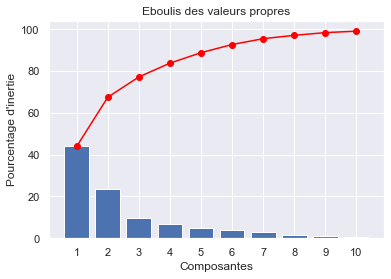

In [92]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Composantes")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.xticks(x_list)
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On peut voir que plus de 80% de la variance est comprise dans les 4 premières composantes. 

Les 7 premières composantes comprennent elles plus de 95% de la variance. 

Nous calculons maintenant nos composantes et l'affichons de manière lisible : 

In [93]:
pcs = pca.components_

In [94]:
pcs = pd.DataFrame(pcs)

In [95]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Element_Produit_Unité,Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg,Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité de protéines en quantité (g)_Viande de Volailles_g,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour,Disponibilité intérieure_Viande de Volailles_Milliers de tonnes,Exportations - Quantité_Viande de Volailles_Milliers de tonnes,Importations - Quantité_Viande de Volailles_Milliers de tonnes,Nourriture_Viande de Volailles_Milliers de tonnes,Pertes_Viande de Volailles_Milliers de tonnes,Population totale_Population-Estimations_1000 personnes,Production_Viande de Volailles_Milliers de tonnes,Résidus_Viande de Volailles_Milliers de tonnes,Traitement_Viande de Volailles_Milliers de tonnes,Valeur US dollars par habitant_Produit Intérieur Brut_US dollars,Valeur US dollars par habitant_Revenu national brut_US dollars,Valeur_Stabilité politique et absence de violence/terrorisme (indice)_indice,Variation de stock_Viande de Volailles_Milliers de tonnes
F1,0.33,0.07,0.06,0.33,0.08,0.33,0.06,0.33,0.18,0.26,0.33,0.01,0.27,0.33,-0.26,0.05,0.05,0.06,0.01,0.27
F2,-0.04,0.42,0.42,-0.05,0.40,-0.02,0.43,-0.03,0.08,-0.03,-0.03,0.05,-0.13,-0.02,0.12,0.09,0.27,0.28,0.28,-0.10
F3,-0.03,-0.24,-0.23,-0.03,-0.27,-0.01,-0.18,-0.02,0.06,0.12,-0.02,-0.16,-0.02,-0.02,0.04,0.40,0.51,0.51,0.23,0.03
F4,0.05,-0.04,-0.05,0.02,-0.03,0.13,-0.05,0.11,0.66,-0.30,0.10,0.05,-0.16,0.21,0.34,0.17,-0.04,-0.03,-0.26,-0.37
F5,-0.02,-0.03,-0.06,-0.03,-0.06,-0.01,0.03,-0.01,-0.08,0.12,-0.03,0.95,0.00,-0.03,0.03,0.25,0.02,0.02,-0.08,0.06
F6,-0.05,0.08,0.09,-0.05,0.09,-0.04,0.06,-0.04,-0.05,0.25,-0.04,-0.24,-0.03,-0.06,-0.02,0.81,-0.32,-0.28,-0.08,0.05
F7,-0.02,0.07,0.09,-0.03,0.04,-0.01,0.11,-0.01,-0.19,0.17,-0.01,-0.11,0.06,-0.05,0.07,-0.03,0.25,0.24,-0.87,0.02
F8,0.00,0.03,0.01,-0.00,0.03,0.01,0.04,0.00,-0.21,-0.69,0.01,0.02,0.49,0.02,-0.35,0.26,0.08,0.05,-0.05,-0.18
F9,-0.04,-0.00,0.02,-0.07,0.00,0.02,-0.02,0.02,-0.08,0.23,0.02,-0.01,0.71,-0.02,0.60,-0.05,-0.06,-0.03,0.14,-0.19
F10,-0.17,0.03,0.01,-0.13,0.02,-0.24,0.06,-0.23,0.59,-0.06,-0.23,0.00,0.33,-0.10,-0.10,-0.05,0.00,0.00,-0.07,0.55


<AxesSubplot:ylabel='Element_Produit_Unité'>

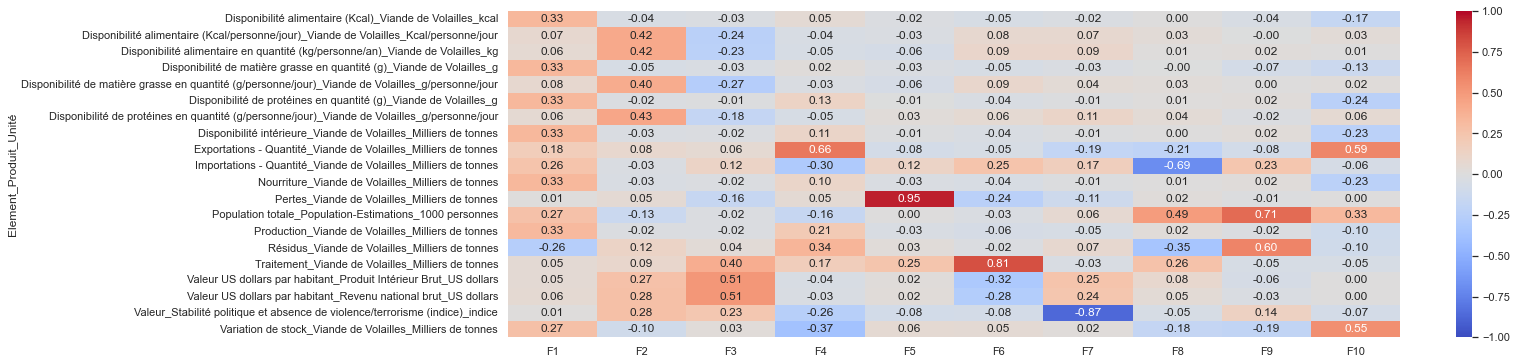

In [96]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Définissons nos axes x et y pour nos 2 premières composantes :

In [97]:
x, y = 0,1

On définit la fonction : 

In [98]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [99]:
x_y = (0,1)
x_y

(0, 1)

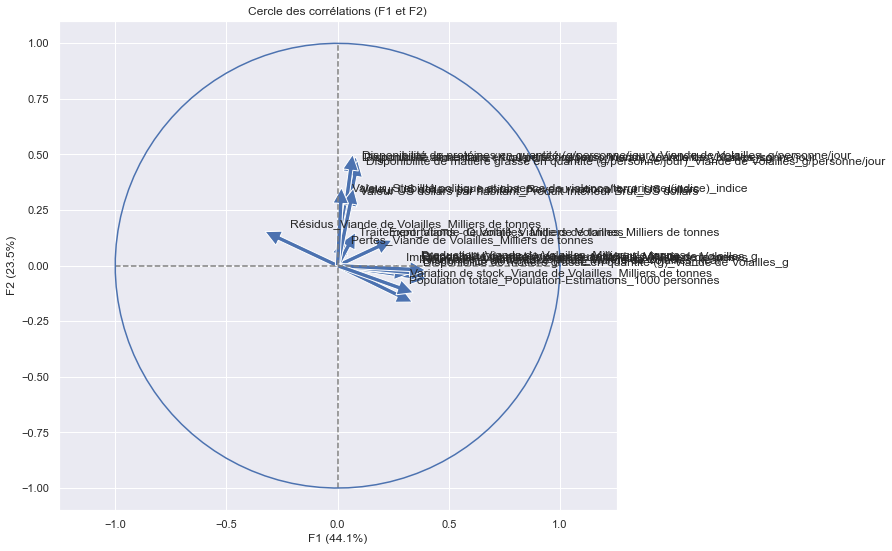

In [100]:
correlation_graph(pca, x_y, features)

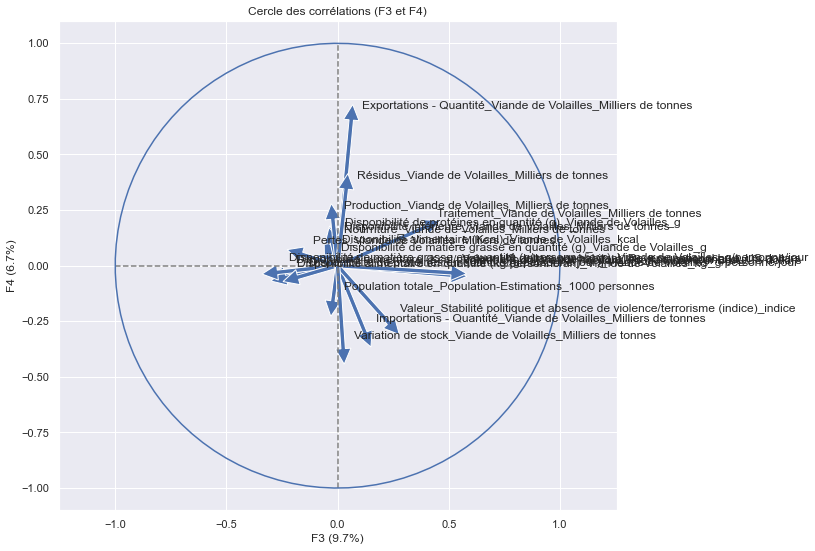

In [101]:
correlation_graph(pca, (2,3), features)

Nous voulons maintenant projeter nos pays sur les axes de nos composantes. Pour cela nous calculons les coordonnées de chaque pays les axes de chacune de nos composantes : 

In [102]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.13449019, -3.09024429, -0.38479955,  0.78882397,  0.15445646,
         0.08241979,  1.75991435,  0.05984105, -0.32079712,  0.09987635],
       [ 1.68305626,  0.90386755, -1.24823377, -0.82226857, -0.09479079,
         0.63893998,  0.41232403, -1.08095518,  0.11471072,  0.26485417],
       [-0.88688634, -0.55718759, -0.28335699, -0.12227249, -0.19181995,
        -0.01044361, -0.46490148, -0.03957885, -0.07002325, -0.0563087 ],
       [-0.90270557, -2.0401335 , -0.02357907,  0.29054783, -0.05228476,
        -0.13422109,  0.14815258,  0.10258363, -0.0752401 , -0.05056942],
       [ 2.01217485,  1.2029923 ,  4.63028827,  0.2661429 ,  1.40996119,
         3.3436237 ,  0.22125148, -0.63795214,  0.19701316,  0.47067477]])

On crée une fonction pour permettre l'affichage de la projection de nos pays sur les axes de nos composantes :

In [103]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



Projection des pays sur les axes F1 et F2 : 

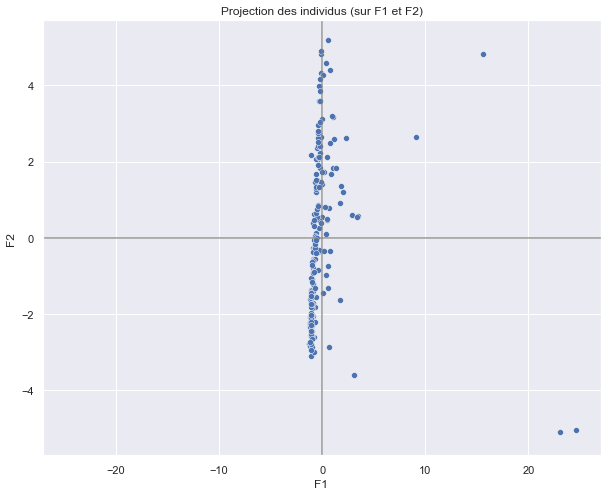

In [104]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

La même chose mais en affichant les noms des pays (même si seuls les pays éloignés des autres sont lisibles) : 

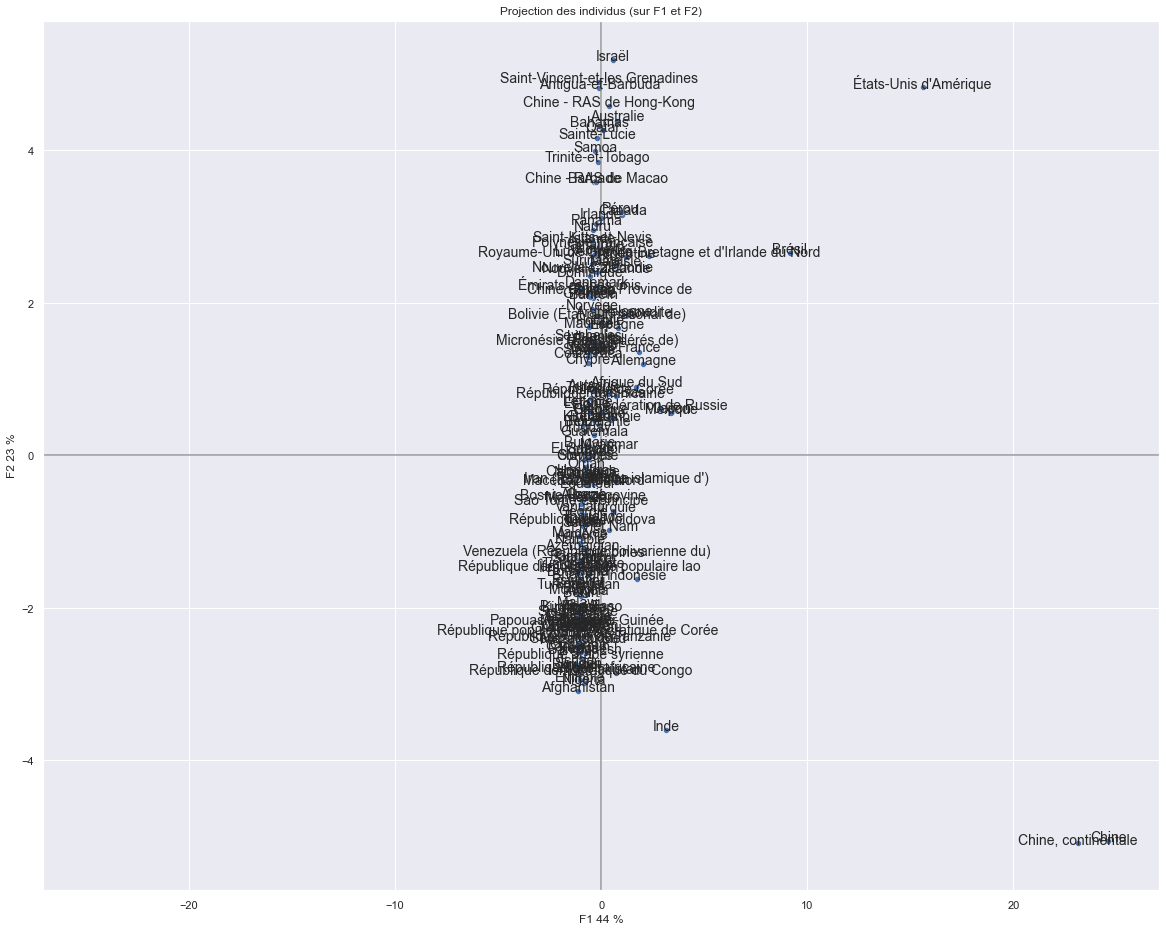

In [105]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

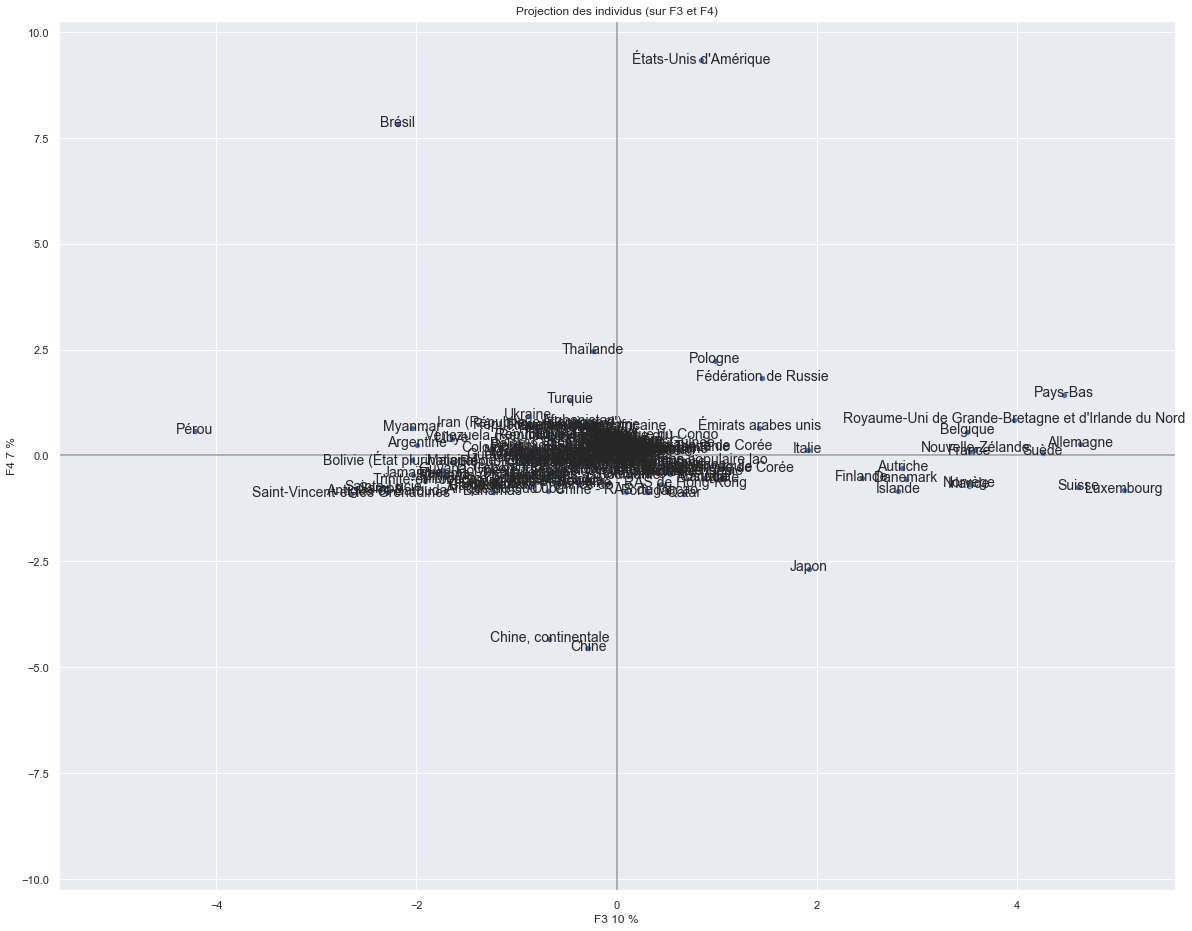

In [106]:
x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

## Réduction des variables

En s'appuyant sur les résultats de l'ACP, il est possible de réduire le nombre de variables de notre jeu de données en observant les fortes corrélations entre les variables :

Certaines variables ne sont ici pas pertinentes puisque représentées en quantité ET en quantité/personne. L'information de la quantité par personne étant bien plus pertinente, la quantité en valeur absolue peut être supprimée :

In [107]:
df_volaille_2020.drop(columns = ["Disponibilité de matière grasse en quantité (g)_Viande de Volailles_g","Disponibilité de protéines en quantité (g)_Viande de Volailles_g","Disponibilité alimentaire (Kcal)_Viande de Volailles_kcal"], inplace = True)

De même que précédemment nous remarquions deux éléments ne fournissant aucun information, nous avons ici un ensemble de variables (toutes les disponibilités alimentaires à l'exception de la disponibilité intérieure) très liées entre elles, ce qui semble logique puisque nous nous intéressons à un seul type de produit et que les disponibilité en matière grasse et proteines dépendent donc de la disponibilité globale, et que seule l'unité varie entre la disponibilité en kg et en kcal. Je vais donc résumer ces 4 variables en une seule :

In [108]:
df_volaille_2020.drop(columns = ["Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles_Kcal/personne/jour","Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour","Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles_g/personne/jour"], inplace = True)

Il en est de même pour la disponibilité intérieure et la nourriture qui sont très étroitement corrélées, je vais donc conserver uniquement la variable "Disponibilité intérieur" :

In [109]:
df_volaille_2020.drop(columns = ["Nourriture_Viande de Volailles_Milliers de tonnes"], inplace = True)

Certains éléments n'ont également pas de pertinence pour notre analyse mais influent sur les résultats de notre ACP.
Avant de poursuivre l'analyse je vais donc supprimer les variables "Traitement","Résidus","Autres utilisations" (l'alimentation pour touristes est incluse dans les "autres utilisations", mais comme une variable à part lui est dédiée je peux me permettre de supprimer celle-ci) :

In [110]:
df_volaille_2020.drop(columns = ["Traitement_Viande de Volailles_Milliers de tonnes","Résidus_Viande de Volailles_Milliers de tonnes"], inplace = True)

On remarque également que le PIB et le RNB sont très corrélés, nous pouvons donc réduire ces deux variable à une seule en ne conservant que le PIB :

In [111]:
df_volaille_2020.drop(columns = ["Valeur US dollars par habitant_Revenu national brut_US dollars"], inplace = True)

## Détection des outliers

On va chercher ici à mettre en évidence les 2% de pays les plus éloignés des autres afin de vérifier s'ils ont leur place dans notre analyse ou non.
Pour cela j'utilise la fonction IsolationForest

In [112]:
#J'instancie
model = IsolationForest(contamination = 0.02)

In [113]:
#Je fit
model.fit(X)

IsolationForest(contamination=0.02)

Je projete le résultat sur les deux premiers axes de notre ACP :

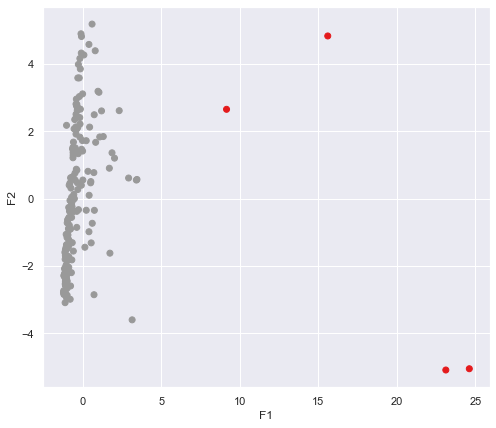

In [114]:
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_proj[:, 0], X_proj[:, 1], c= model.predict(X), cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [115]:
df_volaille_2020.loc[model.predict(X) == -1]

Element_Produit_Unité,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles_kg,Disponibilité intérieure_Viande de Volailles_Milliers de tonnes,Exportations - Quantité_Viande de Volailles_Milliers de tonnes,Importations - Quantité_Viande de Volailles_Milliers de tonnes,Pertes_Viande de Volailles_Milliers de tonnes,Population totale_Population-Estimations_1000 personnes,Production_Viande de Volailles_Milliers de tonnes,Valeur US dollars par habitant_Produit Intérieur Brut_US dollars,Valeur_Stabilité politique et absence de violence/terrorisme (indice)_indice,Variation de stock_Viande de Volailles_Milliers de tonnes
Zone,,,,,,,,,,
Brésil,48.39,10288,4047,5,0,213196.304,14379,6796.844058,-0.420000,48
Chine,15.63,22718,619,2391,0,1456928.486,22059,10429.630529,-0.114615,1113
"Chine, continentale",14.98,21231,525,1554,0,1424929.781,21278,10228.970558,-0.114615,1076
États-Unis d'Amérique,58.69,19451,3878,135,0,335942.003,23150,63122.594145,-0.020000,-43


Les 2% de pays les plus éloignés des autres sont le Brésil, la Chine, la Chine continentale et les Etats-Unis d'Amérique.
Chacun de ces 4 pays se distinguent du reste de notre jeu de données par certaines variables (Chine et Chine continentale : Population très élevée, Etats-Unis : PIB très élevé), mais le point le plus notable est leur forte production de volaille à tous les 4.  

Je vais donc supprimer ces 4 pays avant de poursuivre l'analyse car ils pourraient influer sur les résultats des ACP et clustering alors qu'ils ne présentent aucun intérêt commercial pour l'exportation de nos poulets.

In [116]:
df_volaille_2020.drop(["Brésil","États-Unis d'Amérique","Chine, continentale","Chine"] , inplace=True)

In [117]:
df_volaille_2020.to_csv('df_volaille_2020.csv')